In [11]:
import pandas as pd

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_BTCUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Calculate the returns for each period
df['Return'] = df['Funding Rate'].pct_change()

# Identify negative returns
df['Negative Return'] = df['Return'] < 0

# Count consecutive negative returns
df['Consecutive Negative'] = df['Negative Return'] & df['Negative Return'].shift(-1)

# Calculate the probability of two consecutive negative returns
probability = df['Consecutive Negative'].sum() / (len(df) - 1)

# Convert to percentage
probability_percent = probability * 100

print(f"The probability of two consecutive negative funding rates is {probability_percent:.2f}%")


The probability of two consecutive negative funding rates is 19.97%


In [12]:
import pandas as pd

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_BTCUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Calculate the returns for each period
df['Return'] = df['Funding Rate'].pct_change()

# Identify negative returns
df['Negative Return'] = df['Return'] < 0

# Count instances where a negative return is followed by another negative return
df['Consecutive Negative'] = df['Negative Return'] & df['Negative Return'].shift(-1)

# Calculate the conditional probability
num_consecutive_negative = df['Consecutive Negative'].sum()
num_negative = df['Negative Return'].sum()

if num_negative != 0:
    conditional_probability = num_consecutive_negative / num_negative
    conditional_probability_percent = conditional_probability * 100
    print(f"The conditional probability of the next funding rate being negative given the current one is negative is {conditional_probability_percent:.2f}%")
else:
    print("There are no negative funding rates in the dataset.")



The conditional probability of the next funding rate being negative given the current one is negative is 53.63%


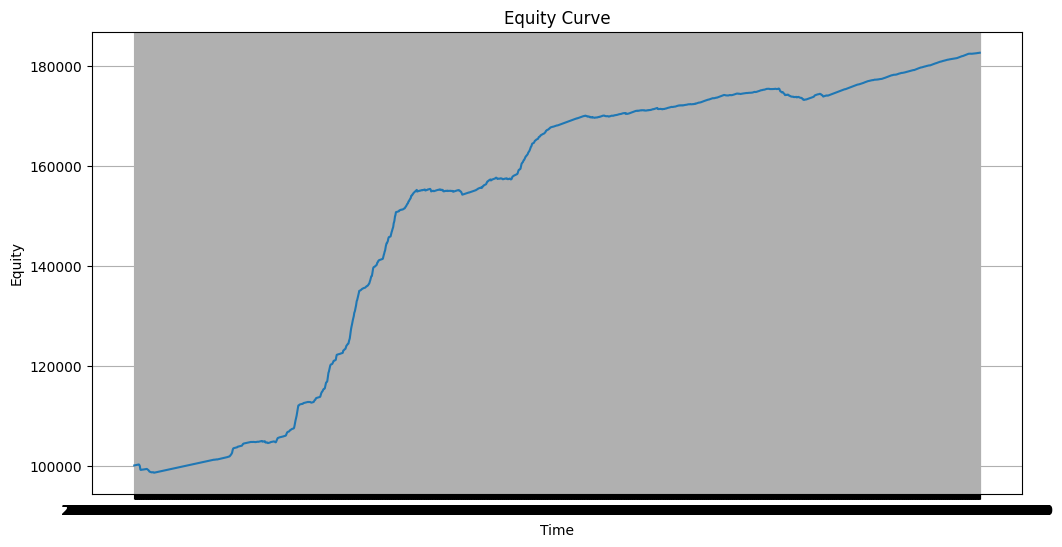

The CAGR is 19.14%
The Maximum Drawdown is -1.65%


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_BTCUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Initial capital
initial_capital = 100000  # in USD

# Calculate the cumulative returns
df['Cumulative Return'] = (1 + df['Funding Rate']).cumprod()

# Calculate the equity curve
df['Equity Curve'] = df['Cumulative Return'] * initial_capital

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(df['Time(UTC)'], df['Equity Curve'])
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.grid(True)
plt.show()

# Calculate CAGR
ending_value = df['Equity Curve'].iloc[-1]
CAGR = ((ending_value / initial_capital) ** (1 / time_span_years)) - 1

# Calculate Maximum Drawdown
df['Peak'] = df['Equity Curve'].cummax()
df['Drawdown'] = (df['Equity Curve'] - df['Peak']) / df['Peak']
max_drawdown = df['Drawdown'].min()

# Convert to percentage
CAGR_percent = CAGR * 100
max_drawdown_percent = max_drawdown * 100

print(f"The CAGR is {CAGR_percent:.2f}%")
print(f"The Maximum Drawdown is {max_drawdown_percent:.2f}%")

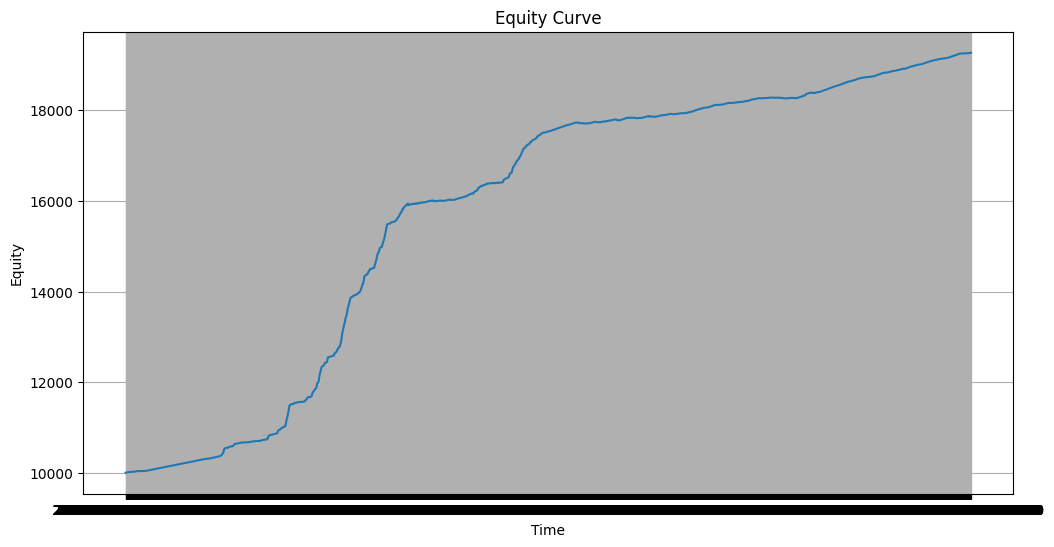

The CAGR is 21.00%
The Maximum Drawdown is -0.21%


In [21]:
import pandas as pd

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_BTCUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Initial capital and variables
initial_capital = 10000  # in USD
cumulative_return = 1.0  # Initialize to 1 for compounding
equity_curve = []
in_strategy = True  # Flag to indicate if we are in the strategy or not

# Loop through each row to calculate equity curve
for index, row in df.iterrows():
    if in_strategy:
        cumulative_return *= (1 + row['Funding Rate'])
    
    equity_curve.append(cumulative_return * initial_capital)
    
    if row['Funding Rate'] > 0:
        in_strategy = True  # Re-enter strategy for the next period
    elif row['Funding Rate'] < 0:
        in_strategy = False  # Exit strategy for the next period

# Add equity curve to DataFrame
df['Equity Curve'] = equity_curve

# Calculate the time span in years
first_time = pd.to_datetime(df.iloc[0]['Time(UTC)'])
last_time = pd.to_datetime(df.iloc[-1]['Time(UTC)'])
time_span_years = (last_time - first_time).days / 365.25

# Calculate CAGR
ending_value = df['Equity Curve'].iloc[-1]
CAGR = ((ending_value / initial_capital) ** (1 / time_span_years)) - 1

# Calculate Maximum Drawdown
df['Peak'] = df['Equity Curve'].cummax()
df['Drawdown'] = (df['Equity Curve'] - df['Peak']) / df['Peak']
max_drawdown = df['Drawdown'].min()

# Convert to percentage
CAGR_percent = CAGR * 100
max_drawdown_percent = max_drawdown * 100

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(df['Time(UTC)'], df['Equity Curve'])
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.grid(True)
plt.show()

print(f"The CAGR is {CAGR_percent:.2f}%")
print(f"The Maximum Drawdown is {max_drawdown_percent:.2f}%")

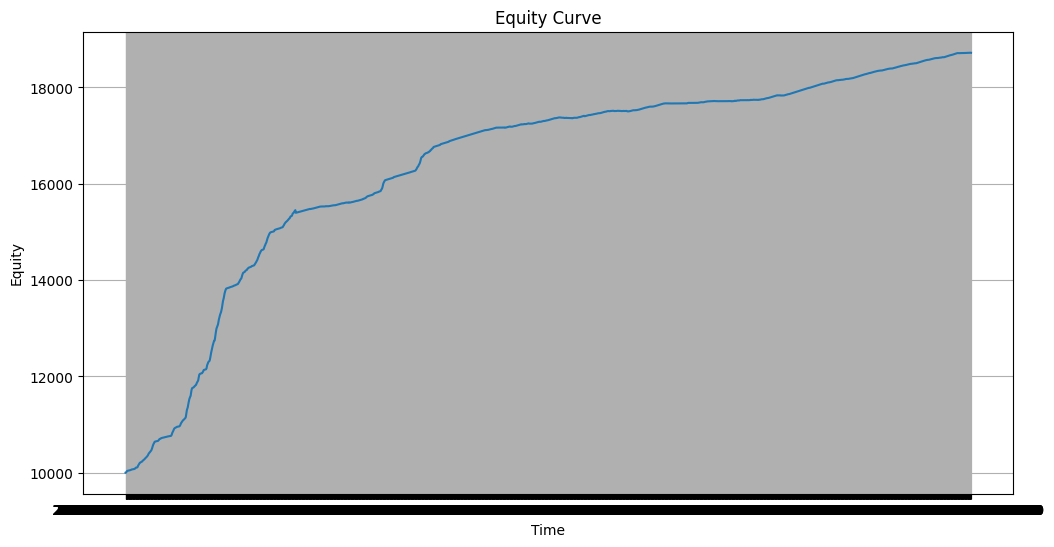

The CAGR is 24.45%
The Maximum Drawdown is -0.35%


In [23]:
import pandas as pd

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_ETHUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Initial capital and variables
initial_capital = 10000  # in USD
cumulative_return = 1.0  # Initialize to 1 for compounding
equity_curve = []
in_strategy = True  # Flag to indicate if we are in the strategy or not

# Loop through each row to calculate equity curve
for index, row in df.iterrows():
    if in_strategy:
        cumulative_return *= (1 + row['Funding Rate'])
    
    equity_curve.append(cumulative_return * initial_capital)
    
    if row['Funding Rate'] > 0:
        in_strategy = True  # Re-enter strategy for the next period
    elif row['Funding Rate'] < 0:
        in_strategy = False  # Exit strategy for the next period

# Add equity curve to DataFrame
df['Equity Curve'] = equity_curve

# Calculate the time span in years
first_time = pd.to_datetime(df.iloc[0]['Time(UTC)'])
last_time = pd.to_datetime(df.iloc[-1]['Time(UTC)'])
time_span_years = (last_time - first_time).days / 365.25

# Calculate CAGR
ending_value = df['Equity Curve'].iloc[-1]
CAGR = ((ending_value / initial_capital) ** (1 / time_span_years)) - 1

# Calculate Maximum Drawdown
df['Peak'] = df['Equity Curve'].cummax()
df['Drawdown'] = (df['Equity Curve'] - df['Peak']) / df['Peak']
max_drawdown = df['Drawdown'].min()

# Convert to percentage
CAGR_percent = CAGR * 100
max_drawdown_percent = max_drawdown * 100

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(df['Time(UTC)'], df['Equity Curve'])
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.grid(True)
plt.show()

print(f"The CAGR is {CAGR_percent:.2f}%")
print(f"The Maximum Drawdown is {max_drawdown_percent:.2f}%")

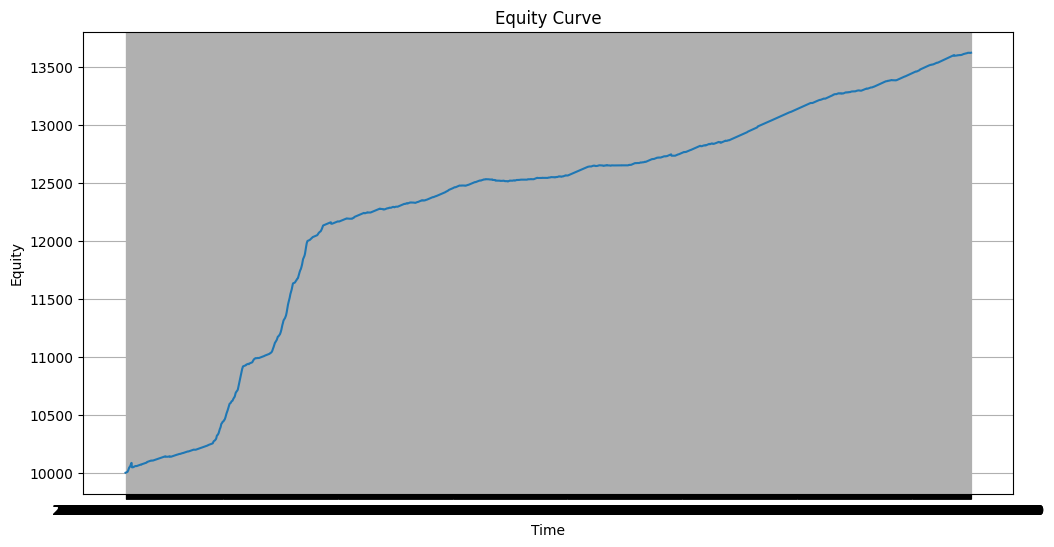

The CAGR is 14.32%
The Maximum Drawdown is -0.38%


In [28]:
import pandas as pd

# Load the xls file into a Pandas DataFrame
df = pd.read_excel('funding_rate_history_XRPUSDT.xlsx')

# Sort the DataFrame by Time in ascending order
df = df.sort_values('Time(UTC)')

# Initial capital and variables
initial_capital = 10000  # in USD
cumulative_return = 1.0  # Initialize to 1 for compounding
equity_curve = []
in_strategy = True  # Flag to indicate if we are in the strategy or not

# Loop through each row to calculate equity curve
for index, row in df.iterrows():
    if in_strategy:
        cumulative_return *= (1 + row['Funding Rate'])
    
    equity_curve.append(cumulative_return * initial_capital)
    
    if row['Funding Rate'] > 0:
        in_strategy = True  # Re-enter strategy for the next period
    elif row['Funding Rate'] < 0:
        in_strategy = False  # Exit strategy for the next period

# Add equity curve to DataFrame
df['Equity Curve'] = equity_curve

# Calculate the time span in years
first_time = pd.to_datetime(df.iloc[0]['Time(UTC)'])
last_time = pd.to_datetime(df.iloc[-1]['Time(UTC)'])
time_span_years = (last_time - first_time).days / 365.25

# Calculate CAGR
ending_value = df['Equity Curve'].iloc[-1]
CAGR = ((ending_value / initial_capital) ** (1 / time_span_years)) - 1

# Calculate Maximum Drawdown
df['Peak'] = df['Equity Curve'].cummax()
df['Drawdown'] = (df['Equity Curve'] - df['Peak']) / df['Peak']
max_drawdown = df['Drawdown'].min()

# Convert to percentage
CAGR_percent = CAGR * 100
max_drawdown_percent = max_drawdown * 100

# Plot the equity curve
plt.figure(figsize=(12, 6))
plt.plot(df['Time(UTC)'], df['Equity Curve'])
plt.title('Equity Curve')
plt.xlabel('Time')
plt.ylabel('Equity')
plt.grid(True)
plt.show()

print(f"The CAGR is {CAGR_percent:.2f}%")
print(f"The Maximum Drawdown is {max_drawdown_percent:.2f}%")